<a href="https://colab.research.google.com/github/paokungz/IS_Project/blob/main/laptop_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest Mean Squared Error: 188917136.84570354
Random Forest R²: 0.912973305902608
Gradient Boosting Mean Squared Error: 181326597.95363292
Gradient Boosting R²: 0.916469968604701


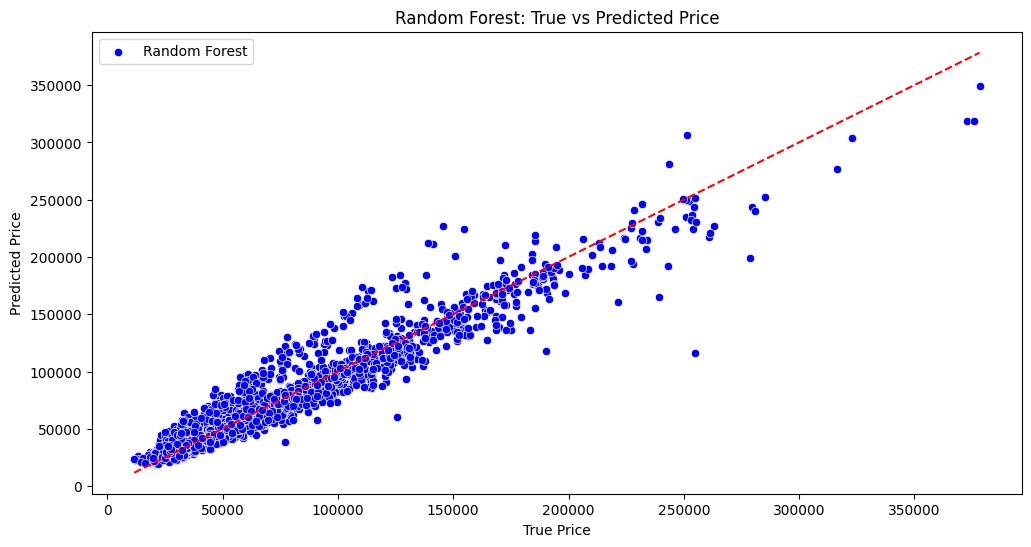

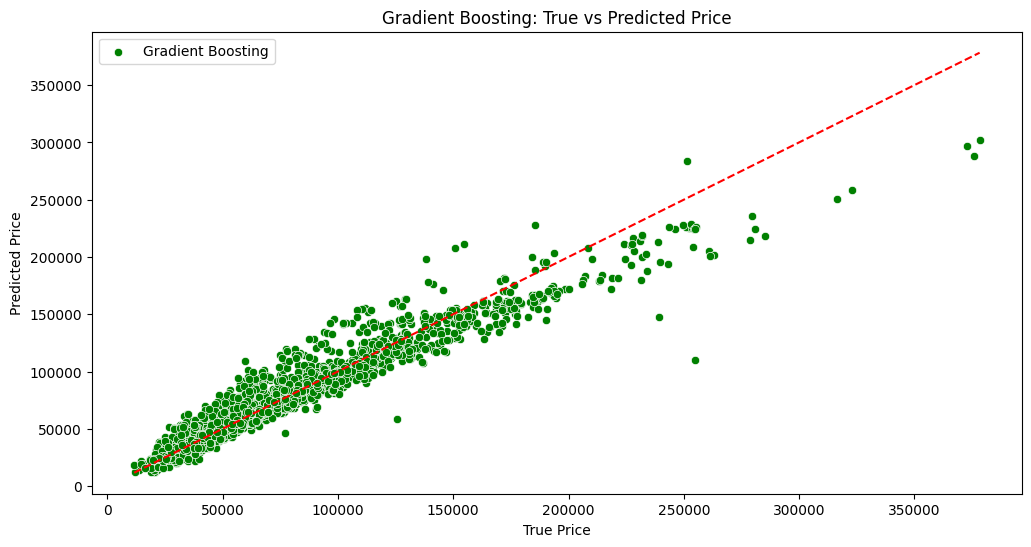

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: การโหลดข้อมูล
file_path = '/content/laptop_prices_mod.csv'  # พาธไฟล์ที่โหลดขึ้น
data = pd.read_csv(file_path)

# Step 2: การจัดการข้อมูล
# เติมค่าที่หายไป (Missing Values) ในคอลัมน์ตัวเลขด้วยค่ามัธยฐาน
imputer = SimpleImputer(strategy='median')
data[['RAM (GB)', 'Storage_Capacity', 'Price_THB']] = imputer.fit_transform(data[['RAM (GB)', 'Storage_Capacity', 'Price_THB']])

# Step 3: One-Hot Encoding สำหรับคอลัมน์ที่เป็น string (Categorical Data)
data = pd.get_dummies(data, drop_first=True)

# Step 4: เตรียมข้อมูลสำหรับโมเดล
X = data.drop(['Price_THB'], axis=1)  # Features
y = data['Price_THB']  # Target variable (Price in THB)

# Step 5: เติมค่าที่หายไปใน Features (X)
X_imputed = imputer.fit_transform(X)  # ใช้ SimpleImputer เติมค่าที่หายไปใน Features

# Step 6: แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 7: สร้างและฝึกโมเดล Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ทำนายผลด้วย Random Forest
y_pred_rf = rf_model.predict(X_test)

# คำนวณ MSE และ R² ของ Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R²:", r2_rf)

# Step 8: สร้างและฝึกโมเดล Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# ทำนายผลด้วย Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# คำนวณ MSE และ R² ของ Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Mean Squared Error:", mse_gb)
print("Gradient Boosting R²:", r2_gb)

# Step 9: Visualization - แสดงการทำนายของทั้งสองโมเดล

# กราฟการทำนาย Random Forest
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: True vs Predicted Price')
plt.legend()
plt.show()

# กราฟการทำนาย Gradient Boosting
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, color='green', label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Gradient Boosting: True vs Predicted Price')
plt.legend()
plt.show()
